In [177]:
# make sure that you have recent version of PyTorch installed
import torch
torch.__version__

'2.0.1+cpu'

In [178]:
# Simple Tensors

a = torch.tensor([[1,2],[3,4]])
print(a)
a = torch.randn(size=(10,3))
print(a)

tensor([[1, 2],
        [3, 4]])
tensor([[ 0.2376,  0.7790,  0.3209],
        [ 0.3987,  1.1270,  0.8921],
        [ 0.3091, -0.2656,  0.1692],
        [ 2.7037, -1.5072,  1.1374],
        [-0.5822, -0.1697, -1.8475],
        [-1.4752, -0.4626,  0.8376],
        [-0.8844, -0.9821, -1.0706],
        [ 0.4913, -1.1010, -1.0494],
        [-0.9393,  0.1589,  0.3334],
        [ 0.4883, -0.8580, -1.0140]])


In [179]:
print(a-a[0])
print(torch.exp(a)[0].numpy())  # extracts numpy-array from tensor

tensor([[ 0.0000,  0.0000,  0.0000],
        [ 0.1612,  0.3481,  0.5712],
        [ 0.0716, -1.0446, -0.1517],
        [ 2.4662, -2.2862,  0.8166],
        [-0.8198, -0.9487, -2.1684],
        [-1.7128, -1.2416,  0.5167],
        [-1.1220, -1.7611, -1.3914],
        [ 0.2537, -1.8800, -1.3703],
        [-1.1768, -0.6201,  0.0125],
        [ 0.2508, -1.6370, -1.3349]])
[1.2681772 2.1791992 1.3783334]


In [180]:
# In-place and out-of-place Operations

u = torch.tensor(5)
print("Result when adding out-of-place:",u.add(torch.tensor(3)))
u.add_(torch.tensor(3))
print("Result after adding in-place:", u)

Result when adding out-of-place: tensor(8)
Result after adding in-place: tensor(8)


In [181]:
# sum or all rows in a matrix

s = torch.zeros_like(a[0])
for i in a:
  s.add_(i)

print(s)

tensor([ 0.7477, -3.2815, -1.2909])


In [182]:
torch.sum(a,axis=0)

tensor([ 0.7477, -3.2815, -1.2909])

In [183]:
# Computing Gradients

a = torch.randn(size=(2, 2), requires_grad=True)
b = torch.randn(size=(2, 2))

c = torch.mean(torch.sqrt(torch.square(a) + torch.square(b)))  # Do some math using `a`   -   tensor(2.2843, grad_fn=<MeanBackward0>) 

c.backward() # call backward() to compute all gradients
# This function triggers automatic differentiation and computes gradients for all tensors that were involved in the computation of c.
# In this case, it computes the gradient of c with respect to a.

# What's the gradient of `c` with respect to `a`?
print(a.grad)   # Tensor that contains the gradient values. These gradient values represent how a small change in each element of 'a' would affect the value of 'c'.


tensor([[ 0.0859,  0.0752],
        [-0.2170, -0.2436]])


In [184]:
c = torch.mean(torch.sqrt(torch.square(a) + torch.square(b)))
c.backward(retain_graph=True)
c.backward(retain_graph=True)
print(a.grad)
a.grad.zero_()  # to restart computing gradients from scratch, resets grad field to 0 explicitly
c.backward()
print(a.grad)


tensor([[ 0.2578,  0.2255],
        [-0.6509, -0.7309]])
tensor([[ 0.0859,  0.0752],
        [-0.2170, -0.2436]])


In [185]:
# For each tensor that has the requires_grad flag set to True,
# PyTorch maintains a special function called grad_fn, which computes the derivative of the expression according to chain differentiation rule

print(c)    # Here c is computed using mean function, thus grad_fn point to a function called MeanBackward.

tensor(1.6595, grad_fn=<MeanBackward0>)


In [186]:
# computing Jacobians
# if we want to compute the gradient of a tensor with respect to another tensor, PyTorch allows us to compute the product of a Jacobian matrix and a given vector.

c = torch.sqrt(torch.square(a) + torch.square(b))
c.backward(torch.eye(2)) # eye(2) means 2x2 identity matrix -    The size of v should be the same as the size of the original tensor, with respect to which we compute the gradient.
print(a.grad)

tensor([[ 0.4296,  0.0752],
        [-0.2170, -1.2182]])


In [187]:
# Optimization Using Gradient Descent

# Let's try to use automatic differentiation to find a minimum of a simple two-variable function f(x1, x2) = (x1-3)^2 + (x2+2)^2 .

# defining starting value of x and the function f
x = torch.zeros(2,requires_grad=True)
f = lambda x : (x-torch.tensor([3,-2])).pow(2).sum()
lr = 0.1

In [188]:
for i in range(15):
    y = f(x)
    y.backward()
    gr = x.grad
    x.data.add_(-lr*gr)
    x.grad.zero_()
    print("Step {}: x[0]={}, x[1]={}".format(i,x[0],x[1]))

# we are approaching the minimum point at (3,-2)

Step 0: x[0]=0.6000000238418579, x[1]=-0.4000000059604645
Step 1: x[0]=1.0800000429153442, x[1]=-0.7200000286102295
Step 2: x[0]=1.4639999866485596, x[1]=-0.9760000705718994
Step 3: x[0]=1.7711999416351318, x[1]=-1.1808000802993774
Step 4: x[0]=2.0169599056243896, x[1]=-1.3446400165557861
Step 5: x[0]=2.2135679721832275, x[1]=-1.4757120609283447
Step 6: x[0]=2.370854377746582, x[1]=-1.5805696249008179
Step 7: x[0]=2.4966835975646973, x[1]=-1.6644556522369385
Step 8: x[0]=2.597346782684326, x[1]=-1.7315645217895508
Step 9: x[0]=2.677877426147461, x[1]=-1.7852516174316406
Step 10: x[0]=2.7423019409179688, x[1]=-1.8282012939453125
Step 11: x[0]=2.793841600418091, x[1]=-1.8625609874725342
Step 12: x[0]=2.835073232650757, x[1]=-1.8900487422943115
Step 13: x[0]=2.868058681488037, x[1]=-1.912039041519165
Step 14: x[0]=2.894446849822998, x[1]=-1.929631233215332


In [189]:
# Linear Regression

# generating small synthetic dataset

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
import random

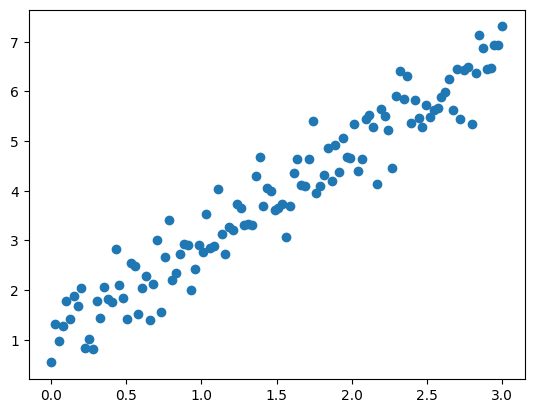

In [190]:
np.random.seed(13) # pick the seed for reproducibility - change it to explore the effects of random variations

train_x = np.linspace(0, 3, 120)
train_labels = 2 * train_x + 0.9 + np.random.randn(*train_x.shape) * 0.5    # at (*train_x.shape), * in the beginning of a function 
                                                                            # is used to unpack the elements of an iterable (e.g., a list, tuple, or array) 
                                                                            # and pass them as separate arguments to a function.
plt.scatter(train_x,train_labels)

In [191]:
# Let's define our model and loss function

input_dim = 1
output_dim = 1
learning_rate = 0.1

# This is our weight matrix
w = torch.tensor([100.0],requires_grad=True,dtype=torch.float32)
# This is our bias vector
b = torch.zeros(size=(output_dim,),requires_grad=True)

def f(x):
    return torch.matmul(x,w) + b

def compute_loss(labels, predictions):
    return torch.mean(torch.square(labels - predictions))

In [192]:
# training the model on a series of minibatches, uing gradient descent

def train_on_batch(x, y):
    predictions = f(x)
    loss = compute_loss(y, predictions)
    loss.backward()
    w.data.sub_(learning_rate * w.grad)
    b.data.sub_(learning_rate * b.grad)
    w.grad.zero_()
    b.grad.zero_()
    return loss

In [193]:
# Shuffle the data.
indices = np.random.permutation(len(train_x))
features = torch.tensor(train_x[indices],dtype=torch.float32)
labels = torch.tensor(train_labels[indices],dtype=torch.float32)


In [194]:
batch_size = 4
for epoch in range(10):
    for i in range(0,len(features),batch_size):
        loss = train_on_batch(features[i:i+batch_size].view(-1,1),labels[i:i+batch_size])   # .view() method is used to reshape a tensor while keeping the same data. 
                                                                                            # -1: It tells PyTorch to compute that dimension such that it maintains the total number of elements.
                                                                                            # 1: This specifies that you want the resulting tensor to have 1 column.
    print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))

Epoch 0: last batch loss = 94.5247
Epoch 1: last batch loss = 9.3428
Epoch 2: last batch loss = 1.4166
Epoch 3: last batch loss = 0.5224
Epoch 4: last batch loss = 0.3807
Epoch 5: last batch loss = 0.3495
Epoch 6: last batch loss = 0.3413
Epoch 7: last batch loss = 0.3390
Epoch 8: last batch loss = 0.3384
Epoch 9: last batch loss = 0.3382


In [195]:
# obtained optimized parameters W and b
#  their values are similar to the original values used when generating the dataset (W = 2, b = 1)
w,b

(tensor([1.8617], requires_grad=True), tensor([1.0711], requires_grad=True))

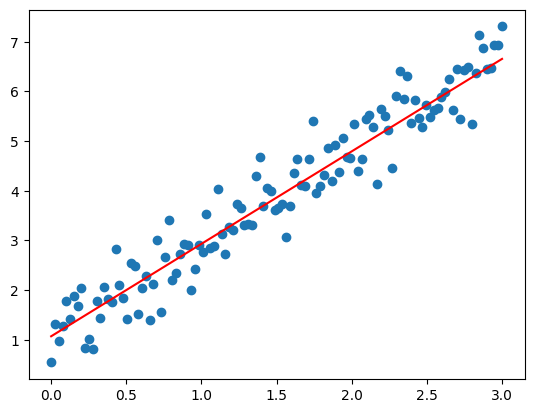

In [196]:
plt.scatter(train_x,train_labels)
x = np.array([min(train_x),max(train_x)])

# Disabling gradient calculation is useful for inference, when you are sure
# that you will not call Tensor.backward(). It will reduce memory consumption for computations that would otherwise have requires_grad=True.
with torch.no_grad():   
    y = w.numpy()*x+b.numpy()
plt.plot(x,y,color='red')

In [197]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

print('Doing computations on '+device)

### Changes here: indicate device
w = torch.tensor([100.0],requires_grad=True,dtype=torch.float32,device=device)
b = torch.zeros(size=(output_dim,),requires_grad=True,device=device)

def f(x):
    return torch.matmul(x,w) + b

def compute_loss(labels, predictions):
    return torch.mean(torch.square(labels - predictions))

def train_on_batch(x, y):
    predictions = f(x)
    loss = compute_loss(y, predictions)
    loss.backward()
    w.data.sub_(learning_rate * w.grad)
    b.data.sub_(learning_rate * b.grad)
    w.grad.zero_()
    b.grad.zero_()
    return loss


batch_size = 4
for epoch in range(10):
    for i in range(0,len(features),batch_size):
        ### Changes here: move data to required device
        loss = train_on_batch(features[i:i+batch_size].view(-1,1).to(device),labels[i:i+batch_size].to(device)) # move all tensors to this device using a call .to(device)
    print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))


Doing computations on cpu
Epoch 0: last batch loss = 94.5247
Epoch 1: last batch loss = 9.3428
Epoch 2: last batch loss = 1.4166
Epoch 3: last batch loss = 0.5224
Epoch 4: last batch loss = 0.3807
Epoch 5: last batch loss = 0.3495
Epoch 6: last batch loss = 0.3413
Epoch 7: last batch loss = 0.3390


Epoch 8: last batch loss = 0.3384
Epoch 9: last batch loss = 0.3382


In [198]:
print(torch.version.cuda)

None


In [199]:
# Classification

# generating sample data
np.random.seed(0) # pick the seed for reproducibility - change it to explore the effects of random variations

n = 100
X, Y = make_classification(n_samples = n, n_features=2,
                           n_redundant=0, n_informative=2, flip_y=0.1,class_sep=1.5)
X = X.astype(np.float32)
Y = Y.astype(np.int32)

split = [ 70*n//100, (15+70)*n//100 ]   # The // operator is used for floor division
train_x, valid_x, test_x = np.split(X, split)   # X[0:69,:], X[70:84,:], X[85:99,:]
train_labels, valid_labels, test_labels = np.split(Y, split)    # Y[0:69,:], Y[70:84,:], Y[85:99,:]


In [200]:
def plot_dataset(features, labels, W=None, b=None):
    # prepare the plot
    fig, ax = plt.subplots(1,1)
    ax.set_xlabel('$x_i[0]$ -- (feature 1)')
    ax.set_ylabel('$x_i[1]$ -- (feature 2)')
    colors = ['r' if l else 'b' for l in labels]
    ax.scatter(features[:, 0], features[:, 1], marker='o', c=colors, s=100, alpha=0.5)
    if W is not None:
        min_x = min(features[:,0])
        max_x = max(features[:,0])
        min_y = min(features[:,1])*(1-.1)   # equivalent to *(1-0.1) = *(0.9)
        max_y = max(features[:,1])*(1+.1)   # equivalent to *(1+0.1) = *(1.1)
        cx = np.array([min_x, max_x],dtype=np.float32)
        cy = (0.5-W[0]*cx-b)/W[1]
        ax.plot(cx,cy,'g')
        ax.set_ylim(min_y,max_y)
    fig.show()

C:\Users\User\AppData\Local\Temp\ipykernel_18164\1674085984.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


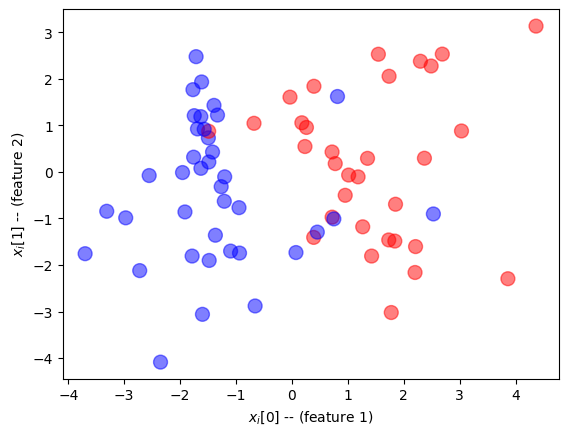

In [201]:
plot_dataset(train_x,train_labels)

In [202]:
# Training One-Layer Perceptron

class Network():
  def __init__(self):
     self.W = torch.randn(size=(2,1),requires_grad=True)
     self.b = torch.zeros(size=(1,),requires_grad=True)

  def forward(self,x):
    return torch.matmul(x,self.W)+self.b

  def zero_grad(self):
    self.W.data.zero_() # used W.data.zero_() instead of W.zero_(), because we cannot directly modify a tensor that is being tracked using Autograd mechanism.
    self.b.data.zero_()

  def update(self,lr=0.1):
    self.W.data.sub_(lr*self.W.grad)
    self.b.data.sub_(lr*self.b)

net = Network()

In [203]:
# The call to binary_cross_entropy_with_logits is equivalent to a call to sigmoid, followed by a call to binary_crossentropy

def train_on_batch(net, x, y):
    z = net.forward(x).flatten()
    loss = torch.nn.functional.binary_cross_entropy_with_logits(input=z,target=y)   # nn stands for 'neural network'
    net.zero_grad()
    loss.backward()
    net.update()
    return loss

In [204]:
# Dataset is the main source of data, it can be either Iterable or Map-style
# Dataloader is responsible for loading the data from a dataset and splitting it into minibatches.

# Create a tf.data.Dataset object for easy batched iteration
dataset = torch.utils.data.TensorDataset(torch.tensor(train_x),torch.tensor(train_labels,dtype=torch.float32))
dataloader = torch.utils.data.DataLoader(dataset,batch_size=16)

list(dataloader)[0]

[tensor([[ 1.5442,  2.5290],
         [-1.6284,  0.0772],
         [-1.7141,  2.4770],
         [-1.4951,  0.7320],
         [-1.6899,  0.9243],
         [-0.9474, -0.7681],
         [ 3.8597, -2.2951],
         [-1.3944,  1.4300],
         [ 4.3627,  3.1333],
         [-1.0973, -1.7011],
         [-2.5532, -0.0777],
         [-1.2661, -0.3167],
         [ 0.3921,  1.8406],
         [ 2.2091, -1.6045],
         [ 1.8383, -1.4861],
         [ 0.7173, -0.9718]]),
 tensor([1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1.])]

In [205]:
for epoch in range(15):
    for (x, y) in dataloader:
        loss = train_on_batch(net,x,y)
    print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))

Epoch 0: last batch loss = 0.5626
Epoch 1: last batch loss = 0.4626
Epoch 2: last batch loss = 0.4007
Epoch 3: last batch loss = 0.3584
Epoch 4: last batch loss = 0.3275
Epoch 5: last batch loss = 0.3037
Epoch 6: last batch loss = 0.2848
Epoch 7: last batch loss = 0.2693
Epoch 8: last batch loss = 0.2562
Epoch 9: last batch loss = 0.2451
Epoch 10: last batch loss = 0.2355
Epoch 11: last batch loss = 0.2271
Epoch 12: last batch loss = 0.2196
Epoch 13: last batch loss = 0.2130
Epoch 14: last batch loss = 0.2070


In [206]:
print(net.W,net.b)

tensor([[1.3882],
        [0.3533]], requires_grad=True) tensor([0.], requires_grad=True)


C:\Users\User\AppData\Local\Temp\ipykernel_18164\1674085984.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


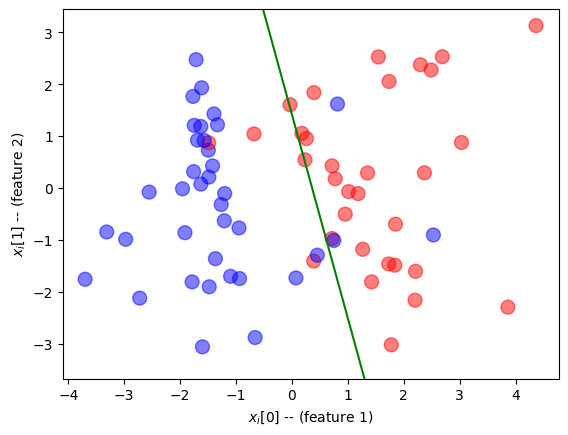

In [207]:
# plotting the line that separates two classes
# Separation line is defined by the equation W * x + b = 0.5 

plot_dataset(train_x,train_labels,net.W.detach().numpy(),net.b.detach().numpy())    
# .detach(): This function is used to create a new tensor that shares data with the original tensor (net.W) but doesn't require gradients to be computed.

In [208]:
# computes accuracy on the validation dataset

pred = torch.sigmoid(net.forward(torch.tensor(valid_x)))    # A "sigmoid" is a mathematical function that maps any real-valued number to a value between 0 and 1.
torch.mean(((pred.view(-1)>0.5)==(torch.tensor(valid_labels)>0.5)).type(torch.float32))


tensor(0.8000)

In [209]:
# Neural Networks and Optimizers

# There are two methods to define your own neural network:
#   Sequential, where you just specify a list of layers that comprise your network
#   As a class inherited from torch.nn.Module

# Most of the activation function and loss functions in PyTorch are available in two form: 
#   as a function (inside torch.nn.functional namespace) 
#   as a layer (inside torch.nn namespace)

# training one-layer perceptron
net = torch.nn.Linear(2,1) # 2 inputs, 1 output

print(list(net.parameters()))   # weight matrix M and bias b

[Parameter containing:
tensor([[0.6110, 0.3263]], requires_grad=True), Parameter containing:
tensor([-0.5875], requires_grad=True)]


In [210]:
# stochastic gradient descent optimizer
optim = torch.optim.SGD(net.parameters(),lr=0.05)

In [211]:
# training loop

val_x = torch.tensor(valid_x)
val_lab = torch.tensor(valid_labels)

for ep in range(10):
    for (x,y) in dataloader:
        z = net(x).flatten()    # net(x) instead of net.forward(x), because nn.Module implements Python __call__() function
        loss = torch.nn.functional.binary_cross_entropy_with_logits(z,y)
        optim.zero_grad()
        loss.backward()
        optim.step()    # parameter update
    acc = ((torch.sigmoid(net(val_x).flatten())>0.5).float()==val_lab).float().mean()
    print(f"Epoch {ep}: last batch loss = {loss}, val acc = {acc}")

Epoch 0: last batch loss = 0.3620089590549469, val acc = 0.7333333492279053
Epoch 1: last batch loss = 0.3409919738769531, val acc = 0.7333333492279053
Epoch 2: last batch loss = 0.3233051002025604, val acc = 0.7333333492279053
Epoch 3: last batch loss = 0.3082394003868103, val acc = 0.800000011920929
Epoch 4: last batch loss = 0.29526233673095703, val acc = 0.800000011920929
Epoch 5: last batch loss = 0.2839694321155548, val acc = 0.8666666746139526
Epoch 6: last batch loss = 0.27405038475990295, val acc = 0.8666666746139526
Epoch 7: last batch loss = 0.2652640640735626, val acc = 0.8666666746139526
Epoch 8: last batch loss = 0.25742122530937195, val acc = 0.800000011920929
Epoch 9: last batch loss = 0.25037166476249695, val acc = 0.800000011920929


In [212]:
# generic train function

def train(net, dataloader, val_x, val_lab, epochs=10, lr=0.05):
    optim = torch.optim.Adam(net.parameters(), lr=lr)   # Adam stands for "Adaptive Moment Estimation,"
                                                        # combines Adagrad and RMSprop techniques
                                                        # adaptive learning rates for each parameter
    for ep in range(epochs):
        for (x,y) in dataloader:
            z = net(x).flatten()
            loss = torch.nn.functional.binary_cross_entropy_with_logits(z,y)
            optim.zero_grad()
            loss.backward()
            optim.step()
        acc = ((torch.sigmoid(net(val_x).flatten())>0.5).float()==val_lab).float().mean()
        print(f"Epoch {ep}: last batch loss = {loss}, val acc = {acc}")

net = torch.nn.Linear(2,1)

train(net,dataloader,val_x,val_lab,lr=0.03)
    

Epoch 0: last batch loss = 0.48608848452568054, val acc = 0.800000011920929
Epoch 1: last batch loss = 0.4124511182308197, val acc = 0.8666666746139526
Epoch 2: last batch loss = 0.35441163182258606, val acc = 0.800000011920929
Epoch 3: last batch loss = 0.3098998963832855, val acc = 0.800000011920929
Epoch 4: last batch loss = 0.2760733664035797, val acc = 0.800000011920929
Epoch 5: last batch loss = 0.25024935603141785, val acc = 0.800000011920929
Epoch 6: last batch loss = 0.23025549948215485, val acc = 0.800000011920929
Epoch 7: last batch loss = 0.21447479724884033, val acc = 0.800000011920929
Epoch 8: last batch loss = 0.2017582654953003, val acc = 0.800000011920929
Epoch 9: last batch loss = 0.1913062483072281, val acc = 0.800000011920929


In [213]:
# Defining Network as a Sequence of Layers
net = torch.nn.Sequential(torch.nn.Linear(2,5),torch.nn.Sigmoid(),torch.nn.Linear(5,1))
print(net)

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=5, out_features=1, bias=True)
)


In [214]:
train(net,dataloader,val_x,val_lab)

Epoch 0: last batch loss = 0.6738813519477844, val acc = 0.5333333611488342
Epoch 1: last batch loss = 0.607823371887207, val acc = 0.5333333611488342
Epoch 2: last batch loss = 0.5476938486099243, val acc = 0.7333333492279053
Epoch 3: last batch loss = 0.47144508361816406, val acc = 0.800000011920929


Epoch 4: last batch loss = 0.38516518473625183, val acc = 0.800000011920929
Epoch 5: last batch loss = 0.3015025854110718, val acc = 0.800000011920929
Epoch 6: last batch loss = 0.22967304289340973, val acc = 0.800000011920929
Epoch 7: last batch loss = 0.17312520742416382, val acc = 0.800000011920929
Epoch 8: last batch loss = 0.13166271150112152, val acc = 0.800000011920929
Epoch 9: last batch loss = 0.10326526314020157, val acc = 0.800000011920929


In [215]:
# Defining a Network as a Class
class MyNet(torch.nn.Module):   # inherited from torch.nn.Module
    def __init__(self,hidden_size=10,func=torch.nn.Sigmoid()):
        super().__init__()
        self.fc1 = torch.nn.Linear(2,hidden_size)
        self.func = func
        self.fc2 = torch.nn.Linear(hidden_size,1)

    def forward(self,x):
        x = self.fc1(x)
        x = self.func(x)
        x = self.fc2(x)
        return torch.Tensor(x)  # Make sure x is a tensor

net = MyNet(func=torch.nn.ReLU())
print(net)

MyNet(
  (fc1): Linear(in_features=2, out_features=10, bias=True)
  (func): ReLU()
  (fc2): Linear(in_features=10, out_features=1, bias=True)
)


In [216]:
train(net,dataloader,val_x,val_lab,lr=0.005)

Epoch 0: last batch loss = 0.4830624759197235, val acc = 0.800000011920929
Epoch 1: last batch loss = 0.44901883602142334, val acc = 0.800000011920929
Epoch 2: last batch loss = 0.41605135798454285, val acc = 0.800000011920929
Epoch 3: last batch loss = 0.3836852014064789, val acc = 0.800000011920929
Epoch 4: last batch loss = 0.35397574305534363, val acc = 0.800000011920929


Epoch 5: last batch loss = 0.32704296708106995, val acc = 0.800000011920929
Epoch 6: last batch loss = 0.30289801955223083, val acc = 0.800000011920929
Epoch 7: last batch loss = 0.28136903047561646, val acc = 0.800000011920929
Epoch 8: last batch loss = 0.2622901499271393, val acc = 0.800000011920929
Epoch 9: last batch loss = 0.24445275962352753, val acc = 0.800000011920929


Epoch 0: last batch loss = 0.8345302939414978, val acc = 0.2666666805744171
Epoch 1: last batch loss = 0.7702497839927673, val acc = 0.2666666805744171
Epoch 2: last batch loss = 0.7113562226295471, val acc = 0.3333333432674408
Epoch 3: last batch loss = 0.65822833776474, val acc = 0.6000000238418579
Epoch 4: last batch loss = 0.6105953454971313, val acc = 0.6666666865348816
Epoch 5: last batch loss = 0.5677527785301208, val acc = 0.6666666865348816
Epoch 6: last batch loss = 0.528814971446991, val acc = 0.7333333492279053
Epoch 7: last batch loss = 0.4934135675430298, val acc = 0.800000011920929
Epoch 8: last batch loss = 0.4602528512477875, val acc = 0.800000011920929
Epoch 9: last batch loss = 0.42989540100097656, val acc = 0.8666666746139526


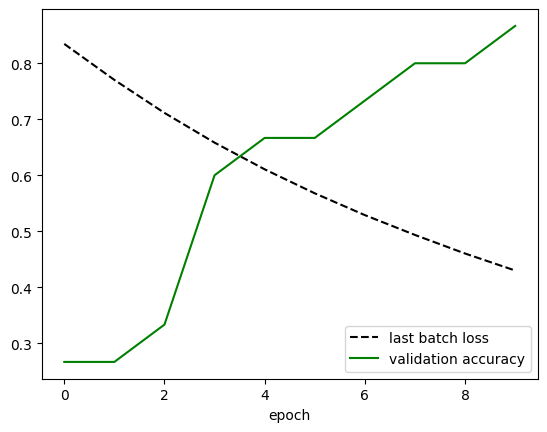

In [217]:
# Plotes the graphs of loss function and accuracy and validation data during training
def plot_training_loss_acc(net, dataloader, val_x, val_lab, epochs=10, lr=0.05):
    fig, ax = plt.subplots(1,1)
    ax.set_xlabel('epoch')
    ax.legend(ax.lines, ['last batch loss', 'validation accuracy'], loc='upper center', ncol = 2) 

    optim = torch.optim.Adam(net.parameters(), lr=lr)   # Adam stands for "Adaptive Moment Estimation,"
                                                        # combines Adagrad and RMSprop techniques
                                                        # adaptive learning rates for each parameter
    loss_values = []  # To store loss values for each epoch
    acc_values = []   # To store accuracy values for each epoch
    
    for ep in range(epochs):
        for (x,y) in dataloader:
            z = net(x).flatten()
            loss = torch.nn.functional.binary_cross_entropy_with_logits(z,y)
            optim.zero_grad()
            loss.backward()
            optim.step()
        acc = ((torch.sigmoid(net(val_x).flatten())>0.5).float()==val_lab).float().mean()

        loss_values.append(loss.detach_())  # Append the loss value for this epoch
        acc_values.append(acc.detach_())    # Append the accuracy value for this epoch
        print(f"Epoch {ep}: last batch loss = {loss}, val acc = {acc}")
    ax.plot(range(epochs), loss_values, 'k--', label='last batch loss')
    ax.plot(range(epochs), acc_values, 'g-', label='validation accuracy')
    plt.legend()

    plt.show()  # Display the plot after all epochs

net = MyNet(func=torch.nn.ReLU())
plot_training_loss_acc(net,dataloader,val_x,val_lab,lr=0.005)